>>>>>>>> Begin run 2022-06-07 22:47:14.160546 <<<<<<<<<<
>>> Project and parametric lists loaded
<><><><><><><><><><><><><><><><><><> foundation_validation_ge15 <><><><><><><><><><><><><><><><><><>
>>> project_id: foundation_validation_ge15
>>> Project data: /Users/pbhaskar/Desktop/Projects/landbosse_public/LandBOSSE/project_data/ge15_public.xlsx
10570956.966055077
10570956.966055077
Collection Cost  32.4629049764573
Development Cost 1.0
Erection Cost 45.411338640182855
Foundation Cost 66.90771340836301
Grid Connection Cost 27.231834352658506
Management Cost 70.47304644036717
Site Preparation Cost 21.396924108527646
Substation Cost 32.39454714721934
Total BOS CapEx 297.27830907377586
Financial Costs  122
Turbine CapEx 1021
Plant Size MW:  150.0


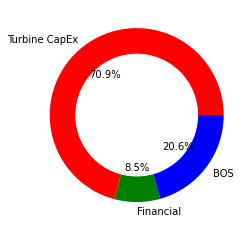

In [1]:
import os
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import pandas as pd

from landbosse.excelio import XlsxSerialManagerRunner
from landbosse.excelio import XlsxParallelManagerRunner
from landbosse.excelio import XlsxGenerator
from landbosse.excelio import XlsxValidator
from landbosse.excelio import CsvGenerator

# When not running Binder and you want to provide your own input data, set_path to False:
set_path = False

# When running Binder set to True
running_binder = False

# LandBOSSE, small utility functions
from landbosse.excelio import XlsxFileOperations
if running_binder == True:
    binder_dir = os.path.join(os.getcwd(), 'jovyan')
    input_output_path = os.path.dirname(binder_dir)
else: 
    if set_path:
        input_output_path = '~/Desktop/'
    else:
        input_output_path = os.path.dirname(os.path.join(os.getcwd(), 'input'))

os.environ["LANDBOSSE_INPUT_DIR"] = input_output_path


if __name__ == '__main__':
    # Print start timestamp
    print(f'>>>>>>>> Begin run {datetime.now()} <<<<<<<<<<')

    # The file_ops object handles file names for input and output data.
    file_ops = XlsxFileOperations()

    run_parallel = False
    manager_runner = XlsxParallelManagerRunner(file_ops) if run_parallel else XlsxSerialManagerRunner(file_ops)

    # project_xlsx is the absolute path of the project_list.xlsx
    projects_xlsx = os.path.join(file_ops.landbosse_input_dir(), 'project_list.xlsx')

    validation_enabled = False
    
    # final_result aggregates all the results from all the projects.
    final_result = manager_runner.run_from_project_list_xlsx(projects_xlsx, validation_enabled)
    # print(final_result)
    total_collection_cost = final_result['jp_collectioncost_total']
    total_development_cost = final_result['jp_developmentcost_total']
    total_erection_cost = final_result['jp_erectioncost_total']
    total_foundation_cost = final_result['jp_foundationcost_total']
    total_gridconnection_cost = final_result['jp_gridconnectioncost_total']
    total_management_cost = final_result['total_management_cost']
    total_sitepreparation_cost = final_result['jp_sitepreperationcost_total']
    total_substation_cost = final_result['jp_substationcost_total']

    total_bos_cost = \
        total_collection_cost + \
        total_development_cost + \
        total_erection_cost + \
        total_foundation_cost + \
        total_gridconnection_cost + \
        total_management_cost + \
        total_sitepreparation_cost + \
        total_substation_cost
    
    plant_capacity_kW = final_result['plant_capacity_MW'] * 1000
        
    total_bos_cost_kW = total_bos_cost / plant_capacity_kW
    financial_costs_kW = 122 
    turbine_capex_kW = 1021
    
    print('Collection Cost ', final_result['jp_collectioncost_total'] / plant_capacity_kW)
    print('Development Cost', final_result['jp_developmentcost_total'] / plant_capacity_kW)
    print('Erection Cost', final_result['jp_erectioncost_total'] / plant_capacity_kW)
    print('Foundation Cost', final_result['jp_foundationcost_total'] / plant_capacity_kW)
    print('Grid Connection Cost', final_result['jp_gridconnectioncost_total'] / plant_capacity_kW)
    print('Management Cost', final_result['total_management_cost'] / plant_capacity_kW)
    print('Site Preparation Cost', final_result['jp_sitepreperationcost_total'] / plant_capacity_kW)
    print('Substation Cost', final_result['jp_substationcost_total'] / plant_capacity_kW)
    print('Total BOS CapEx', total_bos_cost_kW)
    print('Financial Costs ', financial_costs_kW)    
    print('Turbine CapEx', turbine_capex_kW)
    
    print('Plant Size MW: ', final_result['plant_capacity_MW'])
    


    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
#     labels = 'Turbine CapEx', 'Financial', 'BOS'
#     size = [turbine_capex_kW, financial_costs_kW, total_bos_cost_kW]

#     fig1, ax1 = plt.subplots()
#     ax1.pie(size, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#     plt.show()

    
    # create donut plot
    names = ['Turbine CapEx', 'Financial', 'BOS']
    size = [turbine_capex_kW, financial_costs_kW, total_bos_cost_kW]
 
    # Create a circle at the center of the plot
    my_circle = plt.Circle( (0,0), 0.7, color='white')

    # Give color names
    plt.pie(size, labels=names, colors=['red','green','blue'], autopct='%1.1f%%')
    p = plt.gcf()
    p.gca().add_artist(my_circle)

    # Show the graph
    plt.show()

    # returns an exit code of either 0 (successful validation), or 1 (validation failed).
    # If validation was not enabled, exit with a status of 0 (no errors)
    
    # if validation_enabled:
    #     exit(build_status)
    # else:
    #     exit(0)


